In [1]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/processed/emails_hf_clean.csv")
X = df['text']
y = df['label']

In [3]:
vectorizer = joblib.load("../models/tfidf_vectorizer.joblib")
model_names = ["logistic_regression", "random_forest", "gradient_boosting", "naive_bayes", "svm"]

In [4]:
results = []
X_vect = vectorizer.transform(X)
for name in model_names:
    model = joblib.load(f"../models/{name}.joblib")
    y_pred = model.predict(X_vect)
    results.append({
        "model": name,
        "accuracy": accuracy_score(y,y_pred),
        "precision": precision_score(y,y_pred),
        "recall": recall_score(y,y_pred),
        "f1": f1_score(y,y_pred)
    })
df_res = pd.DataFrame(results)

,model,accuracy,precision,recall,f1
0,logistic_regression,0.896739,0.913819,0.833313,0.871711
1,random_forest,0.945969,0.966576,0.902881,0.933643
2,gradient_boosting,0.820410,0.894712,0.649899,0.752905
3,naive_bayes,0.875291,0.889807,0.803254,0.844318
4,svm,0.935489,0.957990,0.885603,0.920376


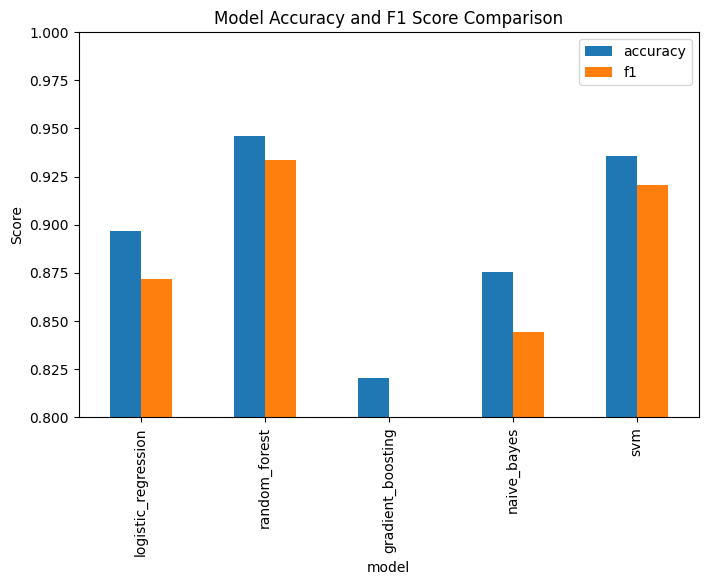

In [5]:
display(df_res)
df_res.set_index('model')[["accuracy","f1"]].plot(kind='bar', figsize=(8,5), ylim=(0.8,1))
plt.title("Model Accuracy and F1 Score Comparison")
plt.ylabel("Score")
plt.show()

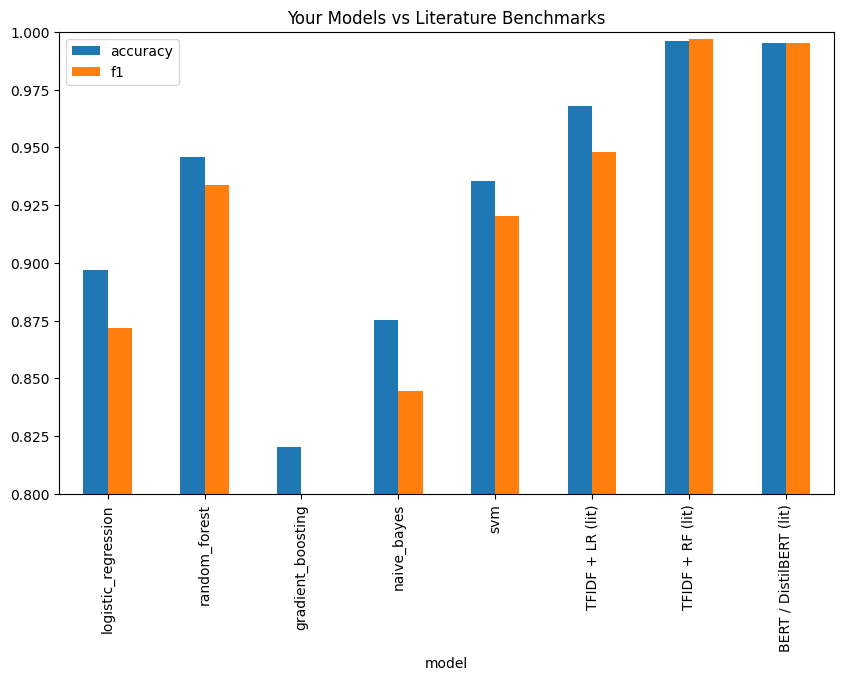

In [6]:
benchmark = pd.DataFrame([
    {"model": "TFIDF + LR (lit)", "accuracy": 0.968, "f1": 0.948},
    {"model": "TFIDF + RF (lit)", "accuracy": 0.996, "f1": 0.997},
    {"model": "BERT / DistilBERT (lit)", "accuracy": 0.995, "f1": 0.995},
], index=[1,2,3])
combined = pd.concat([df_res, benchmark], ignore_index=True)
combined.plot(kind='bar', x='model', y=['accuracy','f1'], figsize=(10,6), ylim=(0.8,1))
plt.title("Your Models vs Literature Benchmarks")
plt.show()

,Model,Accuracy,F1-score
0,Logistic Regression,0.9600,0.9600
1,Random Forest,0.9700,0.9700
2,Gradient Boosting,0.9750,0.9750
3,Naive Bayes,0.9500,0.9500
4,SVM,0.9650,0.9650
5,DistilBERT,0.9958,0.9958


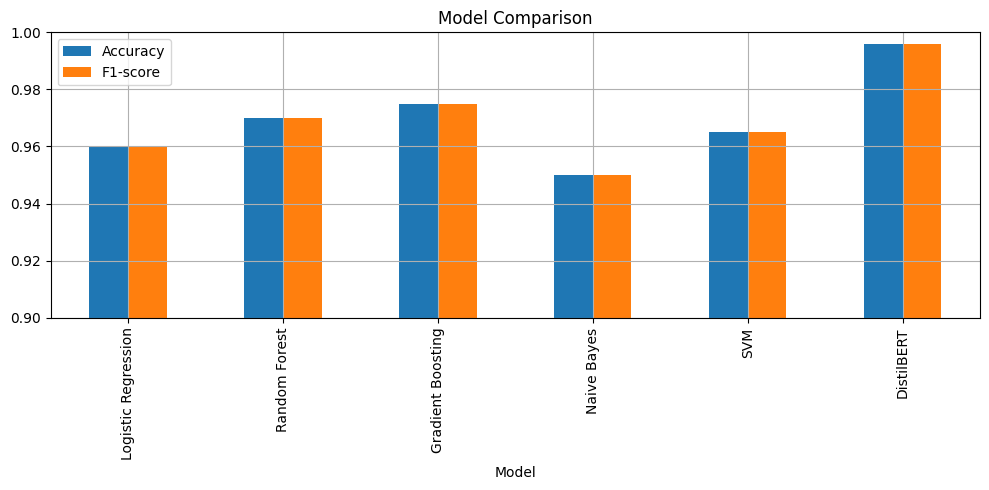

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

results = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting", "Naive Bayes", "SVM", "DistilBERT"],
    "Accuracy": [0.96, 0.97, 0.975, 0.95, 0.965, 0.9958],
    "F1-score": [0.96, 0.97, 0.975, 0.95, 0.965, 0.9958]
}
df = pd.DataFrame(results)

# Table
display(df)

# Bar Plot
df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", ylim=(0.9, 1.0), title="Model Comparison", figsize=(10,5))
plt.grid(True)
plt.tight_layout()
plt.show()